In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
ok_cupid_df = pd.read_csv('data/okcupid_profiles_clean.csv')
ok_cupid_df.columns

Index(['age', 'height', 'male', 'gay', 'straight', 'available', 'married',
       'seeing someone', 'single', 'artistic / musical / writer',
       ...
       'tibetan', 'turkish', 'ukrainian', 'urdu', 'vietnamese', 'welsh',
       'yiddish', 'last_online_year', 'last_online_month',
       'last_online_weekday'],
      dtype='object', length=405)

In [3]:
ok_cupid_df.shape

(59943, 405)

In [4]:
ok_cupid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59943 entries, 0 to 59942
Columns: 405 entries, age to last_online_weekday
dtypes: float64(1), int64(404)
memory usage: 185.2 MB


In [5]:
ok_cupid_df.head(2)

,age,height,male,gay,straight,available,married,seeing someone,single,artistic / musical / writer,...,tibetan,turkish,ukrainian,urdu,vietnamese,welsh,yiddish,last_online_year,last_online_month,last_online_weekday
0,22,75.0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,2012,6,1
1,35,70.0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,2012,6,1


In [6]:
ok_cupid_df_log = np.log(ok_cupid_df+1)

In [7]:
ok_cupid_df_log_sample = ok_cupid_df_log.sample(frac=0.2)

In [8]:
lklk

NameError: name 'lklk' is not defined

In [9]:
from sklearn.decomposition import PCA

# set up our PCA object, we'll take a look at the first 4 principal components
pca = PCA()
pca_log = PCA()
pca_log_sample = PCA()

pca.fit(ok_cupid_df)
pca_log.fit(ok_cupid_df_log)
pca_log_sample.fit(ok_cupid_df_log_sample)

pc_df = pca.transform(ok_cupid_df)
pc_df_log = pca.transform(ok_cupid_df_log)
pc_df_log_sample = pca.transform(ok_cupid_df_log_sample)

In [10]:
cumulative_sum = np.cumsum(pca_log_sample.explained_variance_ratio_)
expl_var = pca_log_sample.explained_variance_ratio_

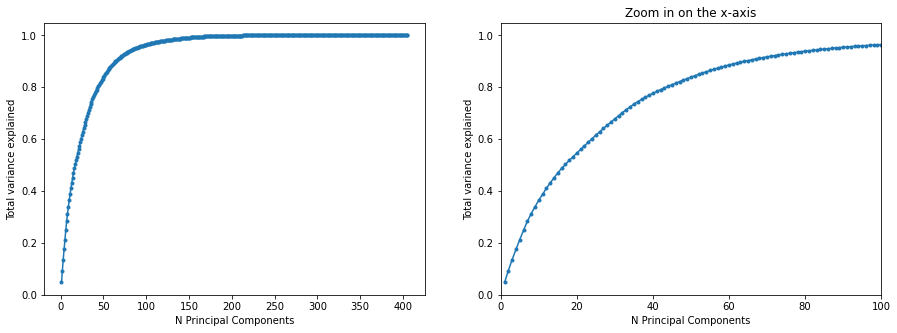

In [13]:
# examine plot for a potential elbow
plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,cumulative_sum.shape[0]+1), cumulative_sum, marker='.')
plt.xlabel('N Principal Components')
plt.ylabel('Total variance explained')
#plt.xticks(range(0,2744,200))

plt.subplot(1,2,2)
plt.plot(range(1,cumulative_sum.shape[0]+1), cumulative_sum, marker='.')
plt.xlabel('N Principal Components')
plt.ylabel('Total variance explained')
plt.title('Zoom in on the x-axis')
plt.xlim(0,100)

plt.show()

In [14]:
pca_log_sample = PCA(n_components=100)

In [15]:
pc_df_log_sample = pca_log_sample.fit_transform(ok_cupid_df_log_sample)

In [ ]:
sns.pairplot(pd.DataFrame(pc_data))

In [ ]:
sns.pairplot(pd.DataFrame(pc_df_log_sample))

In [ ]:
#sns.pairplot(pd.DataFrame(pc_data_log))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(ok_cupid_df)

In [ ]:
X_log = scaler.fit_transform(ok_cupid_df_log)

In [ ]:
from sklearn.cluster import KMeans

k_values = range(1, 21)
inertia_list = []

for k in k_values:
    
    # Create & fit our kmeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    # Get inertia score and add to our list
    inertia_list.append(kmeans.inertia_)

In [ ]:
k_values_log = range(1, 21)
inertia_list_log = []

for k in k_values_log:
    
    # Create & fit our kmeans model
    kmeans_log = KMeans(n_clusters=k)
    kmeans_log.fit(X_log)
    
    # Get inertia score and add to our list
    inertia_list_log.append(kmeans_log.inertia_)

In [ ]:
# Visualize the scree plot
plt.figure()
plt.plot(k_values, inertia_list, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.show()

In [ ]:
# Visualize the scree plot
plt.figure()
plt.plot(k_values_log, inertia_list_log, marker='.')
plt.xlabel('number of clusters')
plt.ylabel('inertia score')
plt.title('Log')
plt.show()